This is very similar to our previous problem, except that this time the wave speed is not constant, and is dependent on the position of the fluid in space.

This means that the following two equations describe the movement in two dimensions:

$$u_{i,j}^{n+1} = u_{i,j}^n - u_{i,j}^n \frac{\Delta t}{\Delta x} (u_{i,j}^n - u_{i-1,j}^n) - v_{i,j}^n \frac{\Delta t}{\Delta y} (u_{i,j}^n - u_{i,j-1}^n)$$

and 

$$v_{i,j}^{n+1} = v_{i,j}^n - u_{i,j}^n \frac{\Delta t}{\Delta x} (v_{i,j}^n - v_{i-1,j}^n) - v_{i,j}^n \frac{\Delta t}{\Delta y} (v_{i,j}^n - v_{i,j-1}^n)$$

The same initial and boundary conditions as last time will be used:

Initial condition:

$u(x,y) = 2 $ for $x \geq 0.5$ and $y \leq 1$

$u(x,y) = 1 $ elsewhere


Boundary condition:

$u = 1$ on all boundaries ($x=0,2$, $y=0,2$)

In [1]:
#Importing packages

#Plotting library that is new to me
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
#Declare parameter variables

nx = 101 #Number of x points
ny = 101 #Number of y points
steps = 100 #Number of time steps to simulate
dx = 2 / (nx - 1) #Difference in x between x points
dy = 2 / (ny - 1) #Difference in y between y points
sigma = .2 #Not sure yet - defines the time step
dt = sigma * dx #Difference in time between time steps

#Not 100% sure this is required, but makes sense in my head
c = 1

#Create grid
x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

#Holds current grid conditions in a matrix
u = np.ones((ny, nx))
v = np.ones((ny, nx))

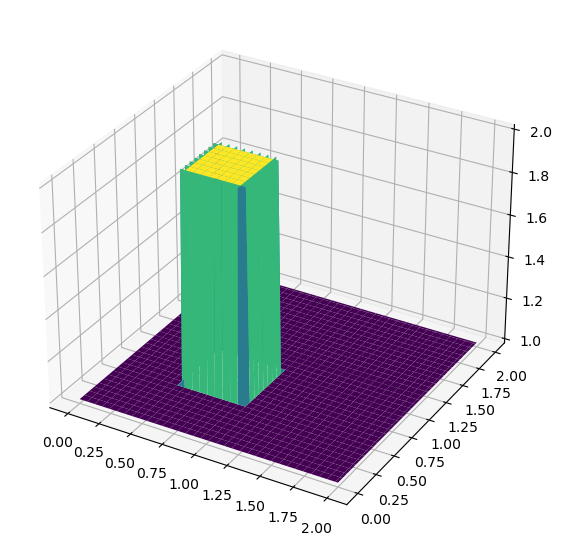

In [3]:
#Initial conditions

u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 
v[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 

#Display intial condition
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')                      
X, Y = np.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

In [4]:
#Update code
def update(u, v, dt, dx, dy, c):
    unext = u.copy()
    vnext = v.copy()
    
    #Update with update rule and numpy matrix operations
    unext[1:, 1:] = (u[1:, 1:] - (u[1:, 1:] * c * dt / dx * (u[1:, 1:] - u[1:, :-1])) -
                              (v[1:, 1:] * c * dt / dy * (u[1:, 1:] - u[:-1, 1:])))  
    vnext[1:, 1:] = (v[1:, 1:] - (u[1:, 1:] * c * dt / dx * (v[1:, 1:] - v[1:, :-1])) -
                              (v[1:, 1:] * c * dt / dy * (v[1:, 1:] - v[:-1, 1:])))  
    
    
    #Specify boundary conditions
    
    unext[0,:] = 1
    unext[-1,:] = 1
    unext[:,0] = 1
    unext[:,-1] = 1
    
    vnext[0,:] = 1
    vnext[-1,:] = 1
    vnext[:,0] = 1
    vnext[:,-1] = 1
    
    return unext, vnext

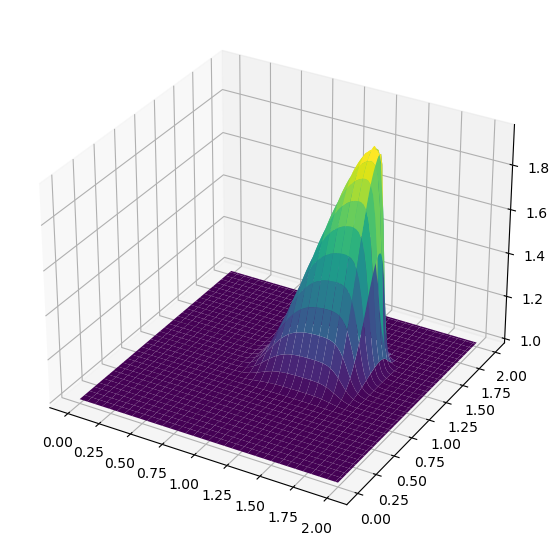

In [5]:
#Update
for i in range(steps):
    u, v = update(u, v, dt, dx, dy, c) #Having a "c" term makes sense, but is not in the equations


#Plot again
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')                      
X, Y = np.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

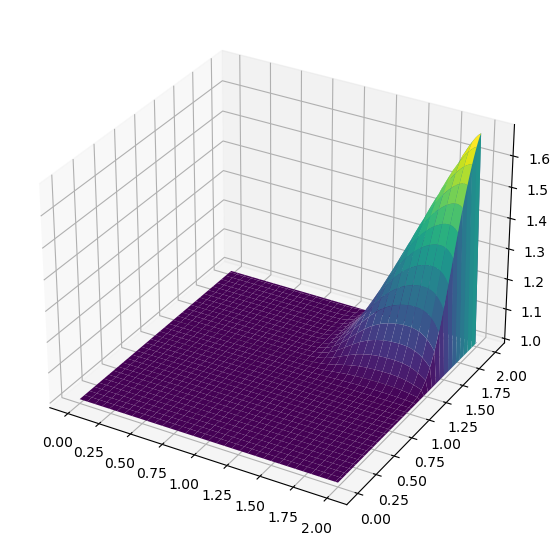

In [6]:
#Update
for i in range(steps):
    u, v = update(u, v, dt, dx, dy, c)


#Plot again
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')                      
X, Y = np.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)